# 5. Creating colorful cars

Now, the `car.py` file has been modified so that `__init__` takes in an optional color parameter!

Your tasks for this notebook are:
1. Create multiple cars of different colors
2. Move them around and display the result
3. (Optional) Add another variable to __init__ like maximum_speed or a boolean true or false depending on if the car has good speakers. It's up to you!

Your options for color values include:
* b: blue
* g: green
* r: red
* c: cyan
* m: magenta
* y: yellow
* k: black
* w: white

More color info can be found, [here](https://matplotlib.org/api/colors_api.html).

In [6]:
import numpy as np
import car

%matplotlib inline

# Auto-reload function so that this notebook keeps up with 
# changes in the class file 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define some initial variables

In [7]:
# Create a 2D world of 0's
height = 4
width = 6
world = np.zeros((height, width))

# Define the initial car state
initial_position = [0, 0] # [y, x] (top-left corner)
velocity = [0, 1] # [vy, vx] (moving to the right)

# Create a car with initial params
carla = car.Car(position = initial_position,
                velocity = velocity,
                world = world)

### Creating another car object

In [8]:
# Defining another inital state
postion2 = [2, 2]
velocity2 = [1, 0]

# Creating a car with initial params
jeannette = car.Car(position = postion2,
                    velocity = velocity2,
                    world = world,
                    color = 'y')

### Move and display two cars

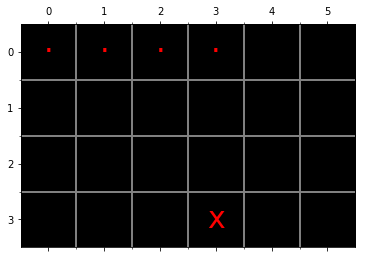

In [9]:
# Move carla
carla.move()
carla.move()
carla.move()
carla.turn_left()
carla.move()

# Displaying the carla's world
carla.display_world()

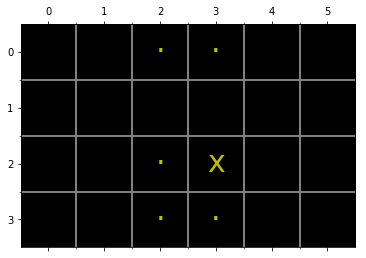

In [10]:
# Move Jeannette
jeannette.move()
jeannette.move()
jeannette.turn_left()
jeannette.move()
jeannette.turn_left()
jeannette.move()
jeannette.move()

# Displaying the jeannette's world
jeannette.display_world()

# 6. Color playground

In [16]:
# Notice we are importing the color class!

import numpy as np
import color

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


r, g, b = 200, 100, 100


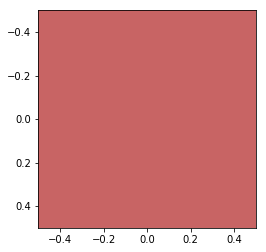

In [17]:
# r, g, b
r = 200
g = 100
b = 100

# Create the color object
test_color = color.Color(r, g, b)

# This will throw an error if the class code is incomplete
print(test_color)

# 7. Overloading functions

Now that we’ve seen how to create a class and talked about some of the fundamental functions and variables that classes contain, let’s look at something new!

The double underscore __X__
You’ve seen a couple of examples of functions that have a double underscore, like:

`__init__`

`__repr__`

These are special functions that are used by Python in a specific way.

We typically don't call these functions directly, as we do with ones like move() and `turn_left()`.

Instead, Python calls them automatically based on our use of keywords and operators.

For example, `__init__` is called when we create a new object and `__repr__` is called when we tell Python to print the string representation of a specific object!

Another example: `__add__`
All of these special functions have their names written between double underscores __, and there are many of these types of functions! To see the full list of these functions, check out the Python documentation.

For example, we can define what happens when we add two car objects together using a + symbol by defining the `__add__` function.

<code>
def __add__(self, other):
    # Create an empty list
    added_state = []

    # Add the states together, element-wise
    for i in range(self.state):
        added_value = self.state[i] + other.state[i]
        added_state.append(added_value)

    return added_state
</code>

The above version, adds together the state variables! Or.. you may choose to just print out that adding cars is an invalid operation, as below.

<code>
    def __add__(self, other):
        # Print an error message and return the unchanged, first state
        print('Adding two cars is an invalid operation!')
        return self.state
</code>

**Operator Overloading**

When we define these functions in our class, this is called operator overloading.

And, in this case, overloading just means: giving more than one meaning to a standard operator like addition.

Operator overloading can be a powerful tool, and you’ll not only see it pop up again and again in classes, but it is useful for writing classes that are intuitive and simple to use. So, keep this in mind as you continue learning, and let's get some practice with overloading operators!

# Adding colors

In [18]:
# Notice we are importing the color class!

import numpy as np
import color

%matplotlib inline

# Auto-reload function so that this notebook keeps up with 
# changes in the class file 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define colors and print them out

r, g, b = 250, 0, 0


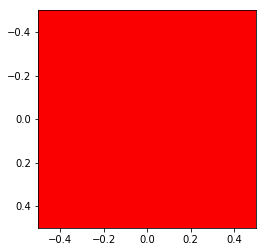

In [19]:
color1 = color.Color(250, 0, 0)
print(color1)

r, g, b = 0, 50, 200


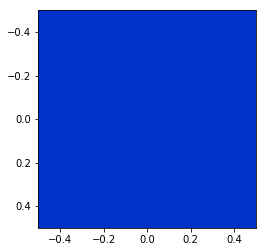

In [21]:
color2 = color.Color(0, 50, 200)
print(color2)

### Add the two colors and visualize the result!

Once you've implemented the `__add__` function in the color class, you should be able to add colors with a `+` operator and display the result!

Remember, to go back to all your files, click on the orange Jupyter icon at the top left of this notebook!


r, g, b = 250, 50, 200


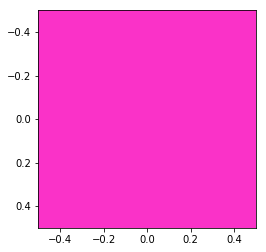

In [22]:
# Add the two colors to create a *new* color object
new_color = color1 + color2
print(new_color)

# 8. Predict state

Here is the current implementation of the `predict_state` function. It takes in a state (a Python list), and then separates those into position and velocity to calculate a new, predicted state. It uses a constant velocity motion model.

**In this exercise, we'll be improving this function, and using matrix multiplication to efficiently calculate the predicted state!**

In [3]:
# The current predict state function
# Predicts the next state based on a motion model
def predict_state(state, dt):
    # Assumes a valid state had been passed in
    x = state[0]
    velocity = state[1]
    
    # Assumes a constant velocity model
    new_x = x + velocity*dt
    
    # Create and return the new, predicted state
    predicted_state = [new_x, velocity]
    return predicted_state

## Matrix operations

You've been given a matrix class that can create new matrices and performs one operation: multiplication. In our directory this is called `matrix.py`.

Similar to the Car class, we can use this to initialize matrix objects.

In [5]:
# import the matrix file
import matrix

# Initialize a state vector
initial_position = 0 # meters
velocity = 50 # m/s

# Notice the syntax for creating a state column vector ([ [x], [v] ])
# Commas separate these items into rows and brackets into columns
initial_state = matrix.Matrix([ [initial_position], 
                                [velocity] ])

### Transformation matrix

Next, define the state transformation matrix and print it out!

In [6]:
# Define the state transformation matrix
dt = 1
tx_matrix = matrix.Matrix([ [1, dt], 
                            [0, 1] ])

print(tx_matrix)

[[1 1 ]
[0 1 ]
]


### TODO: Modify the predict state function to use matrix multiplication

Now that you know how to create matrices, modify the `predict_state` function to work with them!

Note: you can multiply a matrix A by a matrix B by writing `A*B` and it will return a new matrix.


In [7]:
# The current predict state function
def predict_state_mtx(state, dt):
    state_transforation_matrix = matrix.Matrix([[1, dt], 
                                                [0, 1]])
    predicted_state = state_transforation_matrix * state
    
    return predicted_state

### Test cell

Here is an initial state vector and dt to test your function with!

In [8]:
# initial state variables
initial_position = 10 # meters
velocity = 30 # m/s

# Initial state vector
initial_state = matrix.Matrix([ [initial_position], 
                                [velocity] ])


print('The initial state is: ' + str(initial_state))


# after 2 seconds make a prediction using the new function
state_est1 = predict_state_mtx(initial_state, 2)

print('State after 2 seconds is: ' + str(state_est1))

The initial state is: [[10 ]
[30 ]
]
State after 2 seconds is: [[70.0 ]
[30.0 ]
]


In [9]:
# Make more predictions!

# after 3 more
state_est2 = predict_state_mtx(state_est1, 3)

print('State after 3 more seconds is: ' + str(state_est2))

# after 3 more
state_est3 = predict_state_mtx(state_est2, 3)

print('Final state after 3 more seconds is: ' + str(state_est3))

State after 3 more seconds is: [[160.0 ]
[30.0 ]
]
Final state after 3 more seconds is: [[250.0 ]
[30.0 ]
]
